In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [32]:
X,Y = make_circles(n_samples=500,noise = 0.05)

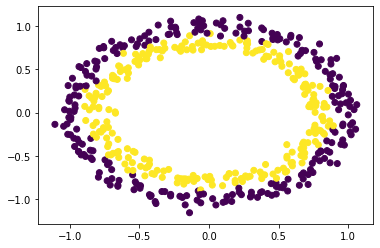

In [33]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [34]:
def phi(X):
    """Non Linear Transformation"""
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,:-1] = X
    X_[:,-1] =X3
    return X_

In [35]:
X_=phi(X)

(500, 3)


In [36]:
print(X_)

[[-0.7198133   0.03425375  0.5193045 ]
 [ 0.55973523 -0.52660034  0.59061144]
 [-0.49809178  0.60687518  0.6163929 ]
 ...
 [-0.31749644  0.74431413  0.65480752]
 [-0.15501238 -0.78750844  0.64419839]
 [ 0.75239433  0.20780875  0.6092817 ]]


In [37]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1= X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade = True)
    if show:
        plt.show()
    return ax

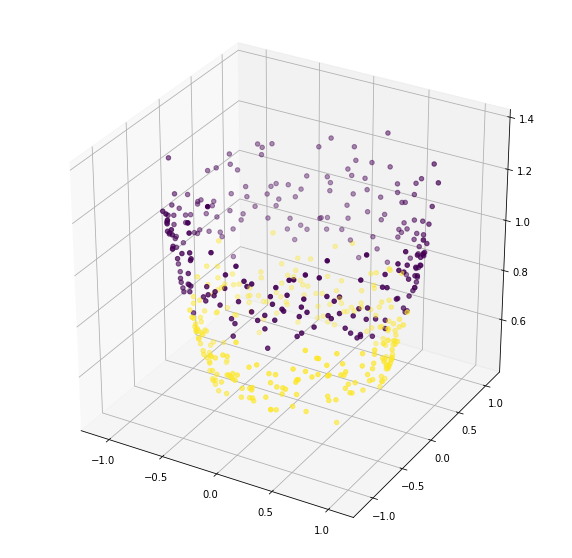

In [38]:
plot3d(X_)

# Logistic Classifier

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [40]:
lr = LogisticRegression()

In [41]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 43.8000


# Logistic classifier on 3d

In [42]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 97.0000


In [43]:
 lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
wts=lr.coef_
bias = lr.intercept_

In [45]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [46]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.8421365  0.83375786 0.82537922 0.81700058]
 [0.83842677 0.83004813 0.82166949 0.81329086]
 [0.83471704 0.8263384  0.81795977 0.80958113]
 [0.83100732 0.82262868 0.81425004 0.8058714 ]]


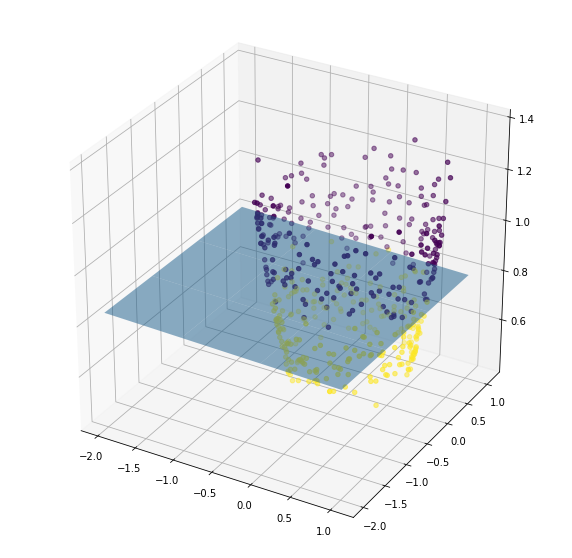

In [47]:
ax = plot3d(X_,show=False)
ax.plot_surface(xx,yy,z,alpha = 0.5)
plt.show()

# SVM with kernel

In [48]:
from sklearn import svm

In [58]:
svc= svm.SVC(kernel="poly")

In [61]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
svc.score(X,Y)

0.516

# Custom Kernel

In [64]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T)+1)

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

0.976